In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [3]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Visualize the data

In [4]:

positive =df_alexa[df_alexa['feedback']==1]
negative =df_alexa[df_alexa['feedback']==0]

c:\Users\sharsaur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

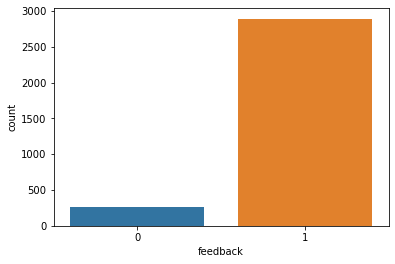

In [5]:
sns.countplot(df_alexa['feedback'], label = "Count") 

<AxesSubplot:xlabel='rating', ylabel='count'>

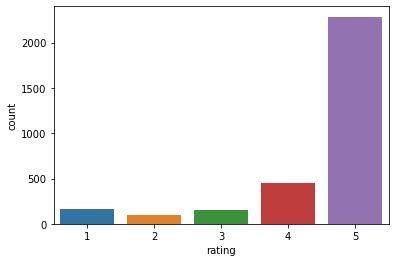

In [6]:
sns.countplot(x = 'rating', data = df_alexa)

<AxesSubplot:xlabel='variation', ylabel='rating'>

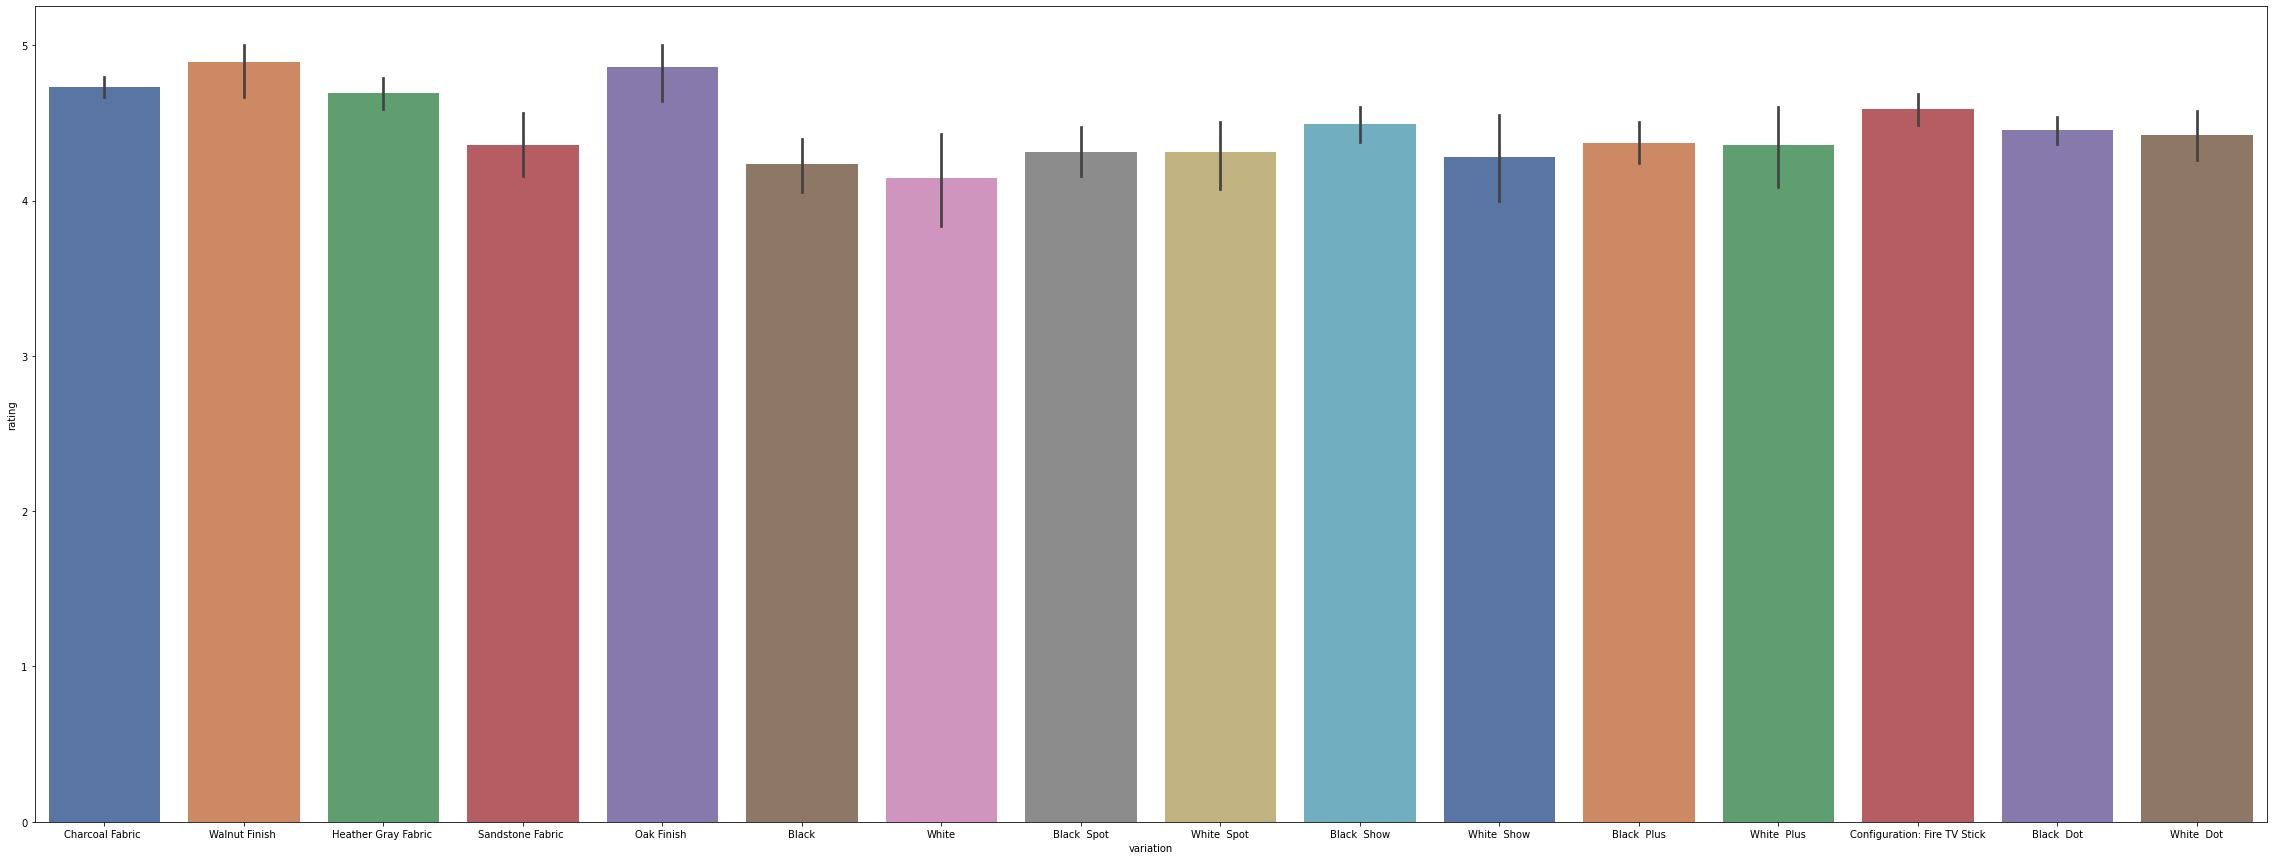

In [7]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data=df_alexa, palette = 'deep')

### Clean data

In [8]:
df_alexa = df_alexa.drop(['date', 'rating'],axis=1)

In [9]:
df_alexa.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [10]:
df_alexa

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [11]:
variation_dummies = pd.get_dummies(df_alexa['variation'], drop_first = True)

In [14]:
# first let's drop the column
df_alexa.drop(['variation'], axis=1, inplace=True)
# Now let's add the encoded column again
df_alexa = pd.concat([df_alexa, variation_dummies], axis=1)

In [15]:
df_alexa.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [21]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])


In [26]:
# first let's drop the column
df_alexa.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(alexa_countvectorizer.toarray())
# Now let's concatenate them together
df_alexa = pd.concat([df_alexa, reviews], axis=1)

4044


### Train the model

In [30]:
# Let's drop the target label coloumns
X = df_alexa.drop(['feedback'],axis=1)
y = df_alexa['feedback']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)
y_train.dtypes

dtype('int64')

In [61]:
ANN_classifier = tf.keras.models.Sequential()
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(4059, )))

ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))

ANN_classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [62]:
ANN_classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = ANN_classifier.fit(X_train, y_train, epochs = 10)

### Evalauation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_test = ANN_classifier.predict(X_test)
y_pred_test

y_pred_test = (y_pred_test > 0.5)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

In [ ]:
plt.plot(epochs_hist.history['loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
plt.plot(epochs_hist.history['accuracy'])

plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])